# SALES PREDICTION USING PYTHON

## Steps to build a ML model:
1. Import Libraries
2. Import dataset
3. Visualizing the dataset
4. Linear Regression
5. Plotting y_test and y_pred

In [1]:
#importing the required Libraries/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)  #deleting the unnamed:0 column

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.shape  #finding no.of rows and columns

(200, 4)

In [8]:
df.isnull().sum().sum()   #Checking for null values

0

In [9]:
df.duplicated().any()  #Checking for duplicate values

False

In [10]:
# Correlation between independent and dependent variable
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### pairplot

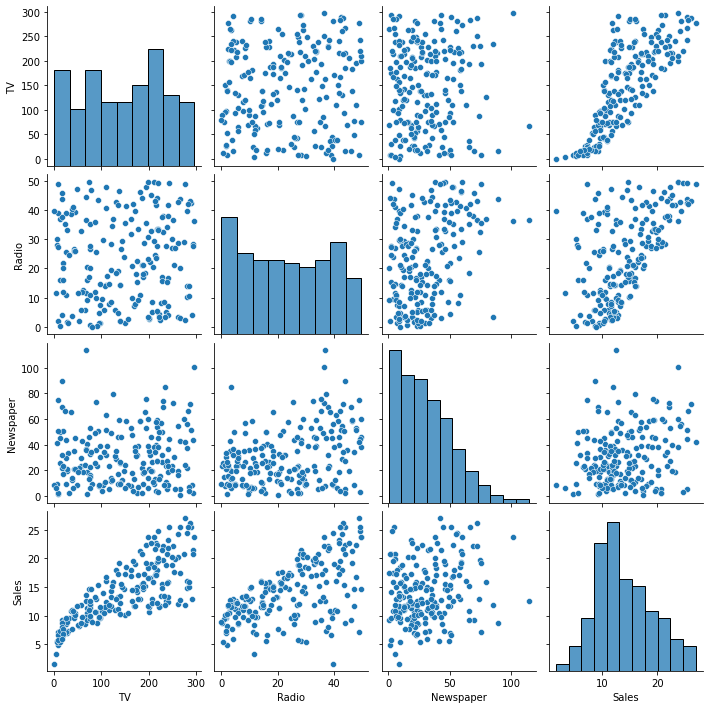

In [11]:
sns.pairplot(df)    #pairplot for the dataframe
plt.show()

##### Heatmap

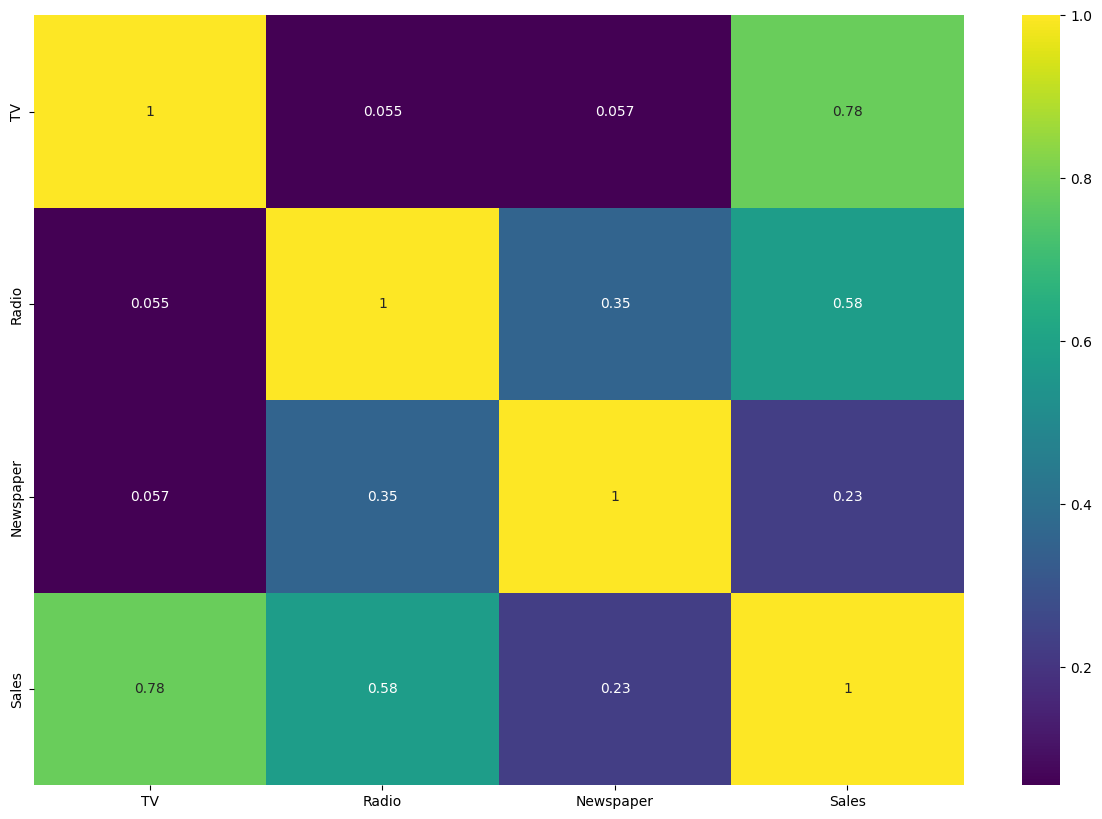

In [119]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap="viridis")
plt.show()

In [13]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
x=scaler.fit_transform(x)

In [16]:
#Spliting data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
x_train.shape

(140, 3)

In [18]:
y_train.shape

(140,)

In [19]:
x_test.shape

(60, 3)

In [20]:
y_test.shape

(60,)

In [21]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [113]:
y_pred=LR.predict(x_test)

Text(0, 0.5, 'y_pred')

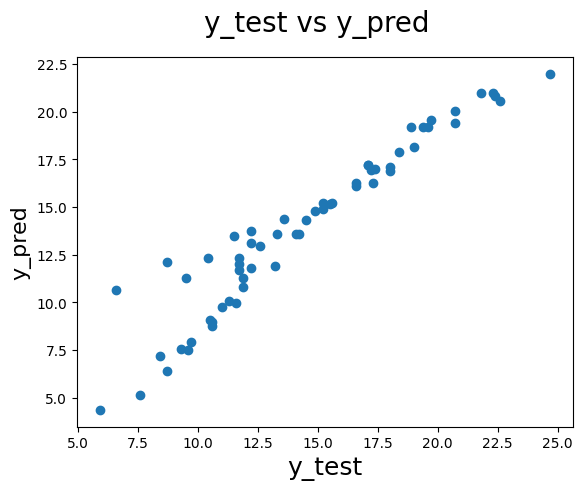

In [114]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean_Absolute_Error:",mean_absolute_error(y_test,y_pred))
print("Mean_Squared_Error:",mean_squared_error(y_test,y_pred))
print("Squre_Mean_Absolute_Error:",np.sqrt(mean_absolute_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean_Absolute_Error: 1.0638483124072031
Mean_Squared_Error: 1.850681994163697
Squre_Mean_Absolute_Error: 1.0314302266305768
r2_score: 0.9058622107532246
